# Fourier series
***

### 1. Review

In my recent studies of [functional analysis](http://personal.lse.ac.uk/sasane/ma412.pdf), I wanted to more deeply understand [Fourier analysis](https://scholar.harvard.edu/files/david-morin/files/waves_fourier.pdf), something that shows up time and time again in areas that care about (physics, statistics & probability, and the analysis of data/signals). This notebook contains a computational treatment of the topic of [Fourier series](https://brilliant.org/wiki/fourier-series/#:~:text=A%20Fourier%20series%20is%20a,larger%20sum%20of%20trigonometric%20terms) - the representation of periodic, piecewise continuous functions using sines and cosines. To motivate the Fourier series, let's quickly review some linear algebra. 

Recall that any vector $v$ in a vector space can be written as sum of weighted basis vectors $\{b_1, \ldots, b_n\}$:

$$
\begin{equation}
v = \sum_{i=1}^{n} \alpha_i b_i
\label{eq:vec} \tag{1}
\end{equation}
$$

In euclidean space, these basis vectors are commonly represented as the set of [orthonormal](https://en.wikipedia.org/wiki/Orthonormal_basis#:~:text=In%20mathematics%2C%20particularly%20linear%20algebra,and%20orthogonal%20to%20each%20other.) canonical basis vectors that consist of vectors containing a single 1 and the rest 0 ($[1, 0, \ldots, 0]$, $[0, 1, \ldots, 0]$, ..., $[0, 0, \ldots, 1]$). But notice that any *rotation* of this basis would also form an orthonormal basis to represent vectors in $\mathbb{R}^n$ as in Eq. $\eqref{eq:vec}$. Keep this in mind as we will later see how the concept of basis representation has an exact mapping to Fourier series.

Now, a vector space with an inner product or the notion of a norm is called an [inner product space](https://en.wikipedia.org/wiki/Inner_product_space). Given two n-dimensional vectors $\mathbf{f}, \mathbf{g}$, the inner product between them is:

$$
\begin{equation}
    \langle \mathbf{f}, \mathbf{g} \rangle = \mathbf{g}^*\mathbf{f} = \sum_{i=1}^{n} f_i \overline{g_i}
    \label{eq:dot} \tag{2}
\end{equation}
$$

Where $\mathbf{g}^*$ is the [conjugate transpose](https://en.wikipedia.org/wiki/Conjugate_transpose) which is just the transpose of $\mathbf{g}$ with each element converted to its complex conjugate. If $\mathbf{g}$ contained only real entries, then $\mathbf{g}^* = \mathbf{g}^\top$ and $\overline{g_i} = g_i$. It's important to bring up the complex inner product since fourier series can also be applied to complex functions.

Now we can raise the question - can we define an inner product over piecewise continuous functions? We can! If we imagine a function $f(x)$ over the interval $[a, b]$, as a vector with countably infinite entries $[f(x_0), f(x_1), \ldots]$ we can also define an inner product! What's the continuous analog of a sum? An integral!

$$
\begin{equation}
    \langle f(x), g(x) \rangle = \int_{a}^{b} f(x) \overline{g}(x) dx
    \label{eq:inner} \tag{3}
\end{equation}
$$

Loosely speaking, the continuous inner product can be viewed as the infinte resolution limit of the finite dimensional inner product. Just like in a finite dimensional vector space, the inner product also induces a norm on the elements:

$$
\begin{equation}
    \left\| f \right\|_2 = \sqrt{\langle f(x), f(x) \rangle} = \left(\int_{a}^{b} f(x) \overline{f}(x)dx \right)^{\frac{1}{2}}
\end{equation}
$$

Additionally, we restrict the function space to contain only functions that have bounded norm, or equivalently [square-integrable](https://en.wikipedia.org/wiki/Square-integrable_function) functions on $[a, b]$. More explicitly, we require that the functions satisfy:

$$
\begin{equation}
    \int_{a}^{b} |f(x)|^2 dx \lt \infty
\end{equation}
$$

Functions that satisfy this requirement form the space $L^2([a, b])$, which is also a [Hilbert space](https://en.wikipedia.org/wiki/Hilbert_space) - a generalization of the euclidean space that arises in many areas of math and physics. This particular function space motivates the study of Fourier series because it the square integrability property mentioned above that gives rise to the inner product defined over functions as described in Eq. $\eqref{eq:inner}$!

### 2. The Mathematics

In 1828, Joseph Fourier in his [dissertation](https://archive.org/details/bub_gb_TDQJAAAAIAAJ) on heat flow, showed that any L-periodic piecewise continuous function can be decomposed as a weighted sum of sines and cosines. The Fourier series for an L-periodic function on $[0, L)$ is:

$$
\begin{equation}
    f(x) = \frac{a_0}{2} + \sum_{k=1}^{\infty} \left[ a_k \cos(\frac{2\pi k}{L}x) + b_k \sin(\frac{2\pi k}{L} x) \right]
    \label{eq:fourier} \tag{4}
\end{equation}
$$

Now we can spot a similarity between Eq. $\eqref{eq:vec}$ and Eq. $\eqref{eq:fourier}$. The Fourier series is nothing but a basis representation of $f(x)$ with $\{ \sin(\frac{2\pi k}{L} x), \cos(\frac{2\pi k}{L}x), \ldots \}_{k=0}^{\infty}$, where $k$ is a positive integer, as an infinite set of orthogonal bases vectors! So that means finding the coefficients $a_k, b_k$ amounts to finding the projection of the function $f(x)$ along the corresponding basis! 

To prove that these sines and cosines actually form an orthogonal basis we can show that their inner products are zero. Let us first define $\frac{2\pi k}{L} := \omega_k$. Taking the inner product of sine, cosine, and sine-cosine pairs over $[0, L)$, we get:

$$
\begin{align*}
    \int_{0}^{L} sin(\omega_n x)sin(\omega_m x)dx &= \frac{\omega_n \sin(L\omega_m)\cos(L\omega_n) - \omega_m\cos(L\omega_m)\sin(L\omega_n)}{\omega_m^2 - \omega_n^2} \\
    &= \frac{L(n \sin(2 \pi m)\cos(2 \pi n) - m\cos(2 \pi m)\sin(2 \pi n))}{2 \pi(m^2 - n^2)}\\
    &= \begin{cases} 0 &\mbox{if } m \ne n \\
        \frac{L}{2} & \mbox{if } m=n \end{cases} \\
    &= \frac{L}{2}\delta_{mn}
\end{align*} 
$$

$$
\begin{align*}
    \int_{0}^{L} cos(\omega_n x)cos(\omega_m x)dx &= \frac{\omega_n \sin(L\omega_n)\cos(L\omega_m) - \omega_m\cos(L\omega_n)\sin(L\omega_m)}{\omega_m^2 - \omega_n^2} \\
    &= \frac{L(n \sin(2 \pi m)\cos(2 \pi n) - m\cos(2 \pi m)\sin(2 \pi n))}{2 \pi(m^2 - n^2)}\\
    &= \begin{cases} 0 &\mbox{if } m \ne n \\
        \frac{L}{2} & \mbox{if } m=n \end{cases} \\
    &= \frac{L}{2}\delta_{mn}
\end{align*} 
$$

$$
\begin{align*}
    \int_{0}^{L} cos(\omega_n x)sin(\omega_m x)dx &= \frac{\omega_n \sin(L\omega_n)\sin(L\omega_m) + \omega_m\cos(L\omega_n)\cos(L\omega_m) - \omega_m}{\omega_m^2 - \omega_n^2} \\
    &= \frac{L(n \sin(2 \pi m)\sin(2 \pi n) + m(\cos(2 \pi m)\cos(2 \pi n) - 1))}{2 \pi(m^2 - n^2)}\\
    &= 0
\end{align*} 
$$

The case where $m=n$ for sine and cosine pairs can be easily shown with [L'Hospital's Rule](https://en.wikipedia.org/wiki/L%27H%C3%B4pital%27s_rule) taking the limit as $n \rightarrow m$, and $\delta_{mn}$ is the [Kronecker delta](https://en.wikipedia.org/wiki/Kronecker_delta).

This shows that the basis set of a Fourier series are in fact mutually orthogonal. Now it is natural to find the coefficients $a_k, b_k$ as we usually would in linear algebra - take the inner product of the 'vector' with the corresponding basis vector. Taking the inner product with a sine and cosine on both sides of Eq. $\eqref{eq:fourier}$ over $[0, L)$ and using the orthogonality rules derived above:

$$
\begin{align*}
    \langle cos(\frac{2 \pi j}{L}x), f(x) \rangle &= \int_{0}^{L} \left(cos(\frac{2 \pi j}{L}x)\frac{a_0}{2} + \sum_{k=1}^{\infty} \left[ a_k cos(\frac{2 \pi j}{L}x)\cos(\frac{2\pi k}{L}x) + b_k cos(\frac{2 \pi j}{L}x)\sin(\frac{2\pi k}{L} x) \right] \right) dx \\
    &= \frac{a_0}{2}\int_{0}^{L}cos(\frac{2 \pi j}{L}x)dx + \frac{L}{2}a_k \\
    &= \frac{L}{2}a_j \\
\end{align*}
$$

Similarly,

$$
\begin{align*}
    \langle sin(\frac{2 \pi j}{L}x), f(x) \rangle &= \int_{0}^{L} \left(sin(\frac{2 \pi j}{L}x)\frac{a_0}{2} + \sum_{k=1}^{\infty} \left[ a_k sin(\frac{2 \pi j}{L}x)\cos(\frac{2\pi k}{L}x) + b_k sin(\frac{2 \pi j}{L}x)\sin(\frac{2\pi k}{L} x) \right] \right) dx \\
    &= \frac{a_0}{2}\int_{0}^{L}sin(\frac{2 \pi j}{L}x)dx + \frac{L}{2}b_k \\
    &= \frac{L}{2}b_j \\
\end{align*}
$$

Where the transition from the second to third line in each derivation is true because the first term in the second equality is an integral over one period. Therefore,

$$
\begin{align}
    a_k &= \frac{2}{L}\langle cos(\frac{2 \pi k}{L}x), f(x) \rangle\\ 
    b_k &= \frac{2}{L}\langle sin(\frac{2 \pi k}{L}x), f(x) \rangle
\end{align}
$$

Now we can put it to the test on some actual signals. For convenience, we make all signals $2\pi$-periodic on the interval $[-\pi, \pi]$.

In [396]:
import matplotlib.pyplot as plt
import numpy as np

# matplotlib parameters
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 14

In [447]:
def fourier_series(x, y, dx, terms=25, show_last=False):
    """Plots the fourier series partial sums as an approximation to the function y
    """
    # define the period length and domain
    n = len(x)
    L = (x.max() - x.min())
    
    # initial coefficient
    a0 = y.sum() * dx
    
    # plot the original function
    fig, ax = plt.subplots()
    ax.set_title(f"Fourier series representation")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.set_xlim(x.min(), x.max())
    ax.plot(x, y, color='k', linewidth=2)

    # plot the fourier approximations
    y_hat = np.full(n, a0 / 2)
    a = np.zeros(terms)
    b = np.zeros(terms)
    for k in range(1, terms):
        
        # compute coefficients
        sine = np.sin(2 * np.pi * k * x / L)
        cosine = np.cos(2 * np.pi * k * x / L) 
        a[k] = (y @ cosine) * dx
        b[k] = (y @ sine) * dx
        
        # compute truncated function and plot
        y_hat += a[k] * cosine + b[k] * sine 
        if not show_last:
            ax.plot(x, y_hat, linewidth=1, alpha=k/terms) 
        
    if show_last:
        ax.plot(x, y_hat, 'r', linewidth=1)

### Top hat function
***

In [448]:
# domain
x = np.pi * np.linspace(-1, 1, 1000)

# co-domain
y = np.zeros_like(x)
y = np.zeros_like(x)
y[quartile: 3 * quartile] = 1

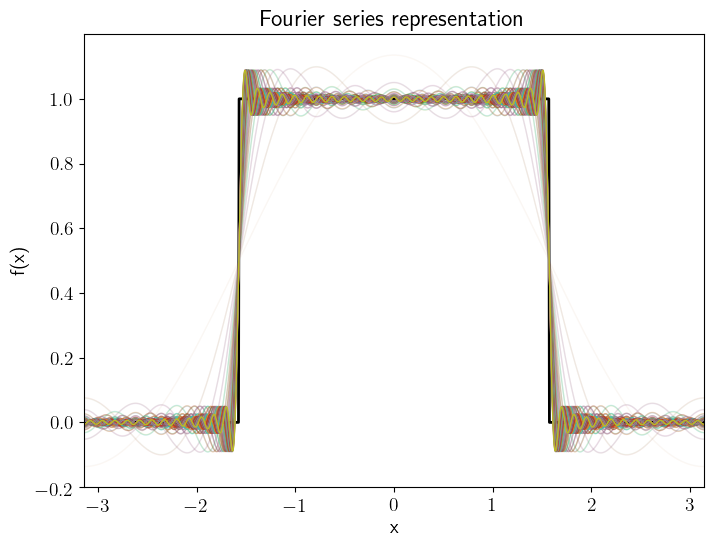

In [449]:
fourier_series(x, y, dx=2/1000, terms=50)

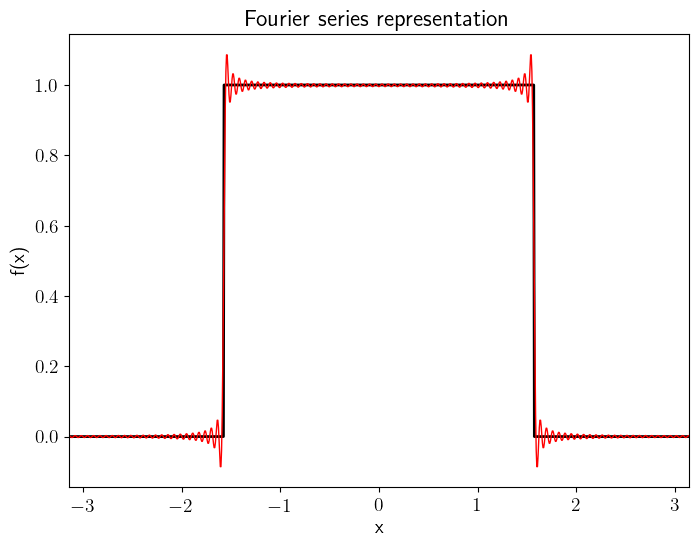

In [450]:
fourier_series(x, y, dx=2/1000, terms=100, show_last=True)

### Triangular hat function
***

In [451]:
# domain
x = np.pi * np.linspace(-1, 1, 1000)

# co-domain
quartile = len(x) // 4
y = np.zeros_like(x)
y[quartile: 2 * quartile] = (4 / len(x)) * np.arange(quartile)
y[2 * quartile: 3 * quartile] = (4 / len(x)) * np.arange(quartile, 0, -1)

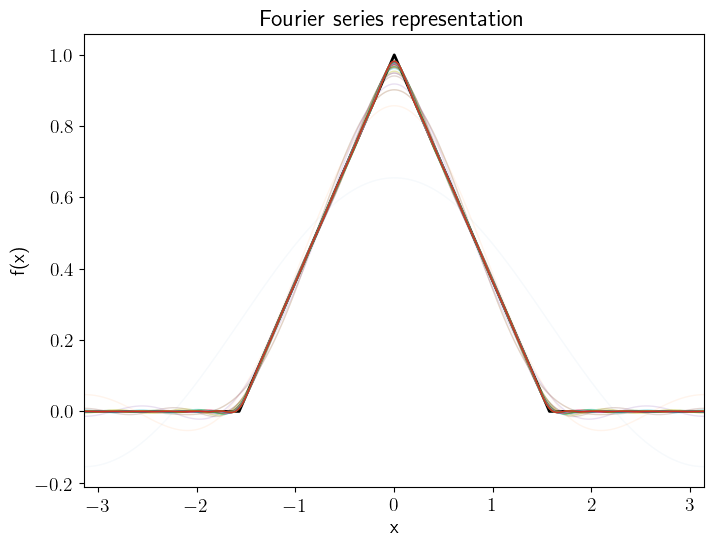

In [452]:
fourier_series(x, y, dx=2/1000)

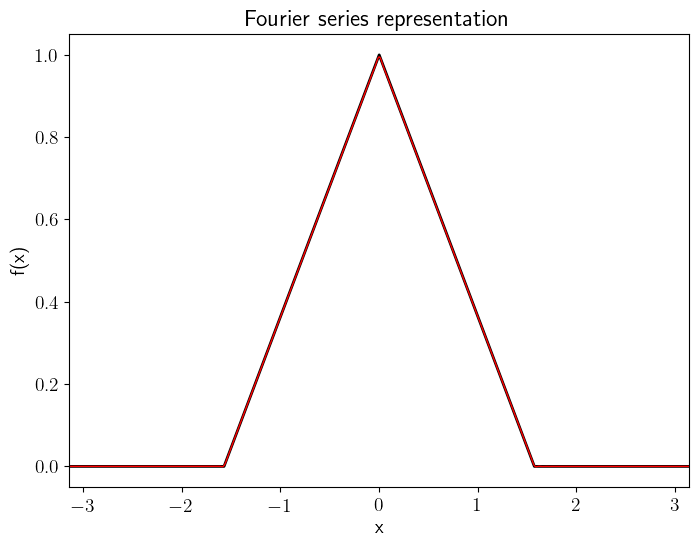

In [453]:
fourier_series(x, y, dx=2/1000, terms=100, show_last=True)

### Saw-tooth wave
***

In [454]:
# domain
x = np.pi * np.linspace(-1, 1, 1000)

# co-domain
quartile = len(x) // 4
y = np.zeros_like(x)
y[0: quartile] = (4 / len(x)) * np.arange(quartile, 0, -1)
y[quartile: 2 * quartile] = (4 / len(x)) * np.arange(quartile, 0, -1)
y[2 * quartile: 3 * quartile] = (4 / len(x)) * np.arange(quartile, 0, -1)
y[3 * quartile:] = (4 / len(x)) * np.arange(quartile, 0, -1)

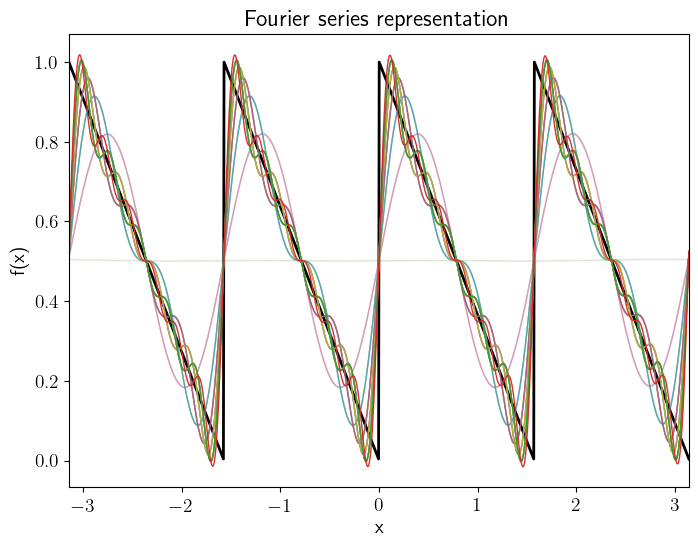

In [455]:
fourier_series(x, y, dx=2/1000)

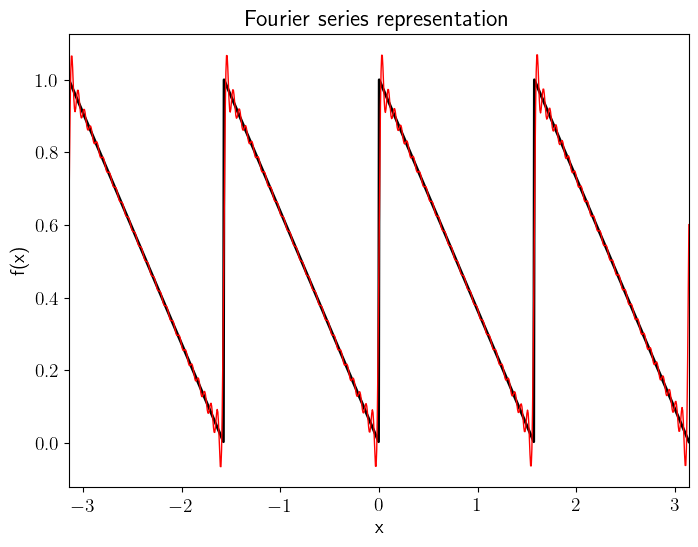

In [456]:
fourier_series(x, y, dx=2/1000, terms=100, show_last=True)

### Kronecker delta
***

In [457]:
# domain
x = np.pi * np.linspace(-1, 1, 1000)

# co-domain
quartile = len(x) // 4
y = np.zeros_like(x)
y[2 * quartile] = 1

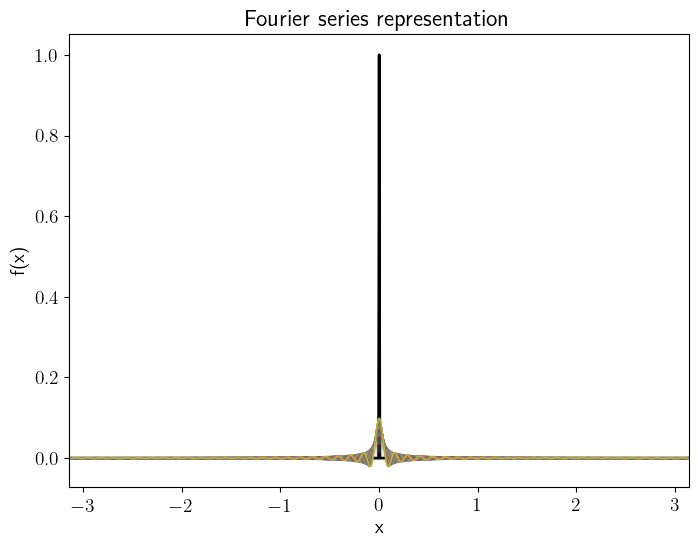

In [458]:
fourier_series(x, y, dx=2/1000, terms=50)

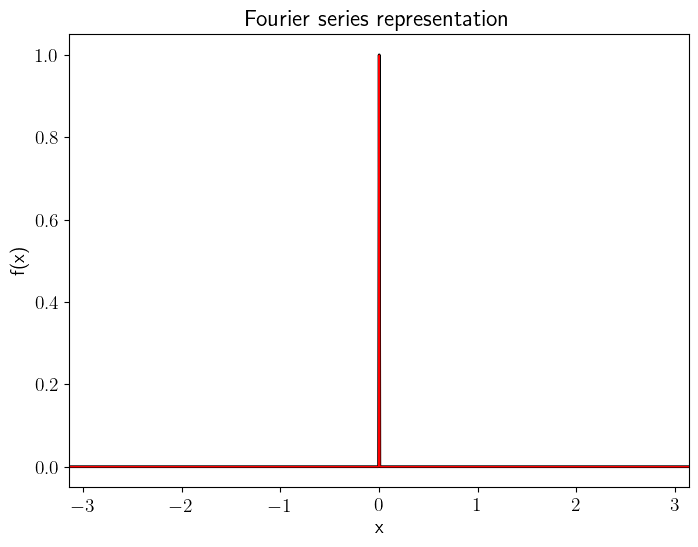

In [459]:
fourier_series(x, y, dx=2/1000, terms=500, show_last=True)

### Top-top hat function
***

In [460]:
# domain
x = np.pi * np.linspace(-1, 1, 1000)

# co-domain
sextile = len(x) // 6
y = np.zeros_like(x)
y[sextile: 2 * sextile] = 1
y[2 * sextile: 4 * sextile] = 2
y[4 * sextile: 5 * sextile] = 1

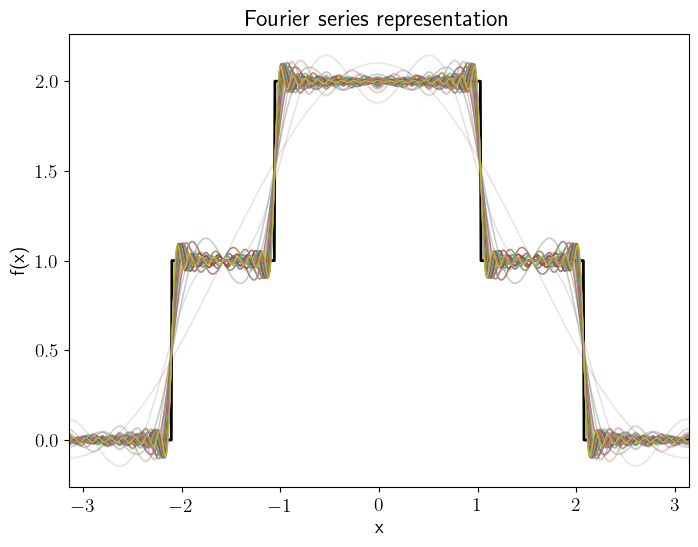

In [461]:
fourier_series(x, y, dx=2/1000, terms=50)

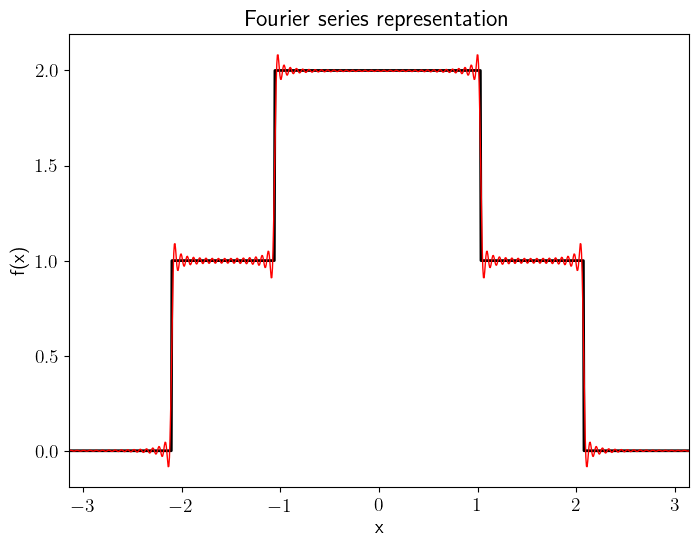

In [462]:
fourier_series(x, y, dx=2/1000, terms=100, show_last=True)

### Random function
***

In [463]:
# domain
x = np.pi * np.linspace(-1, 1, 1000)

# co-domain
y = np.random.randn(1000, 1000) @ x

# smooth out some noise with a gaussian kernel
kernel_x = np.linspace(0.1, 0.1, 100)
sigma = 20
kernel = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-0.5 * (kernel_x / sigma)**2)
y = np.convolve(y, kernel, 'same')

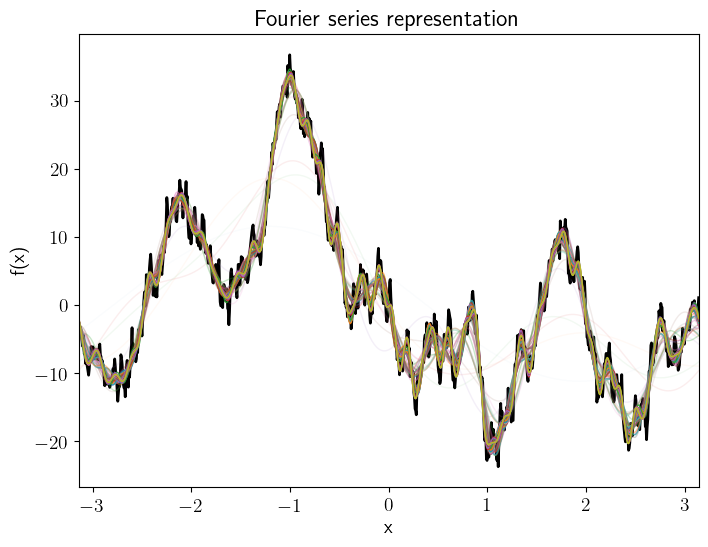

In [464]:
fourier_series(x, y, dx=2/1000, terms=50)

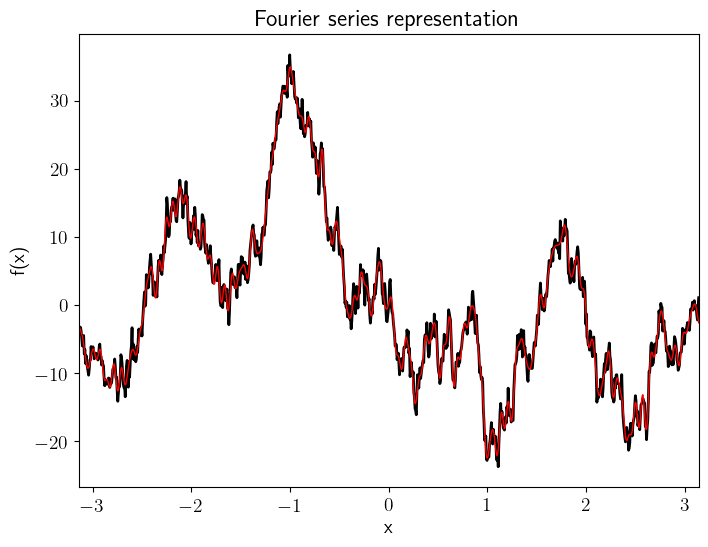

In [465]:
fourier_series(x, y, dx=2/1000, terms=100, show_last=True)